In [ ]:
!pip install qiskit
!pip install qiskit.ignis
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Super Dense Coding

#Difference between quantum teleportation and super dense coding

1. Teleportation --> Transfer qubit state vs Super dense coding --> transfer classical bit

2. Teleportation --> Classical channel vs. Super dense coding -->
quantum channel

#SImple overview of Super Dense Coding
Two Part: Alice and Bob
Goal: Alice will send 2 qubit of classical information to bob

Step 1: Entangled pair with 2 qubits
Step 2: Alice performs some operations to her qubit
Step3: Bob needs to perform some operations on his qubit/message decoode


In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

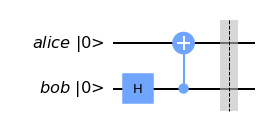

In [ ]:
#Alice's qubit
alice_qreg = QuantumRegister(1, name='alice')

#Bob's qubit
bob_qreg = QuantumRegister(1, name='bob')

#create circuit
superdense_coding_circuit = QuantumCircuit(alice_qreg, bob_qreg)

#Apply h gate to bob qubit
superdense_coding_circuit.h(1)

#Apply cx gate
superdense_coding_circuit.cx(1,0)

superdense_coding_circuit.barrier()

#draw circuit
superdense_coding_circuit.draw(initial_state=True, output='mpl')

Message Alice wants to send
#00 --> alice do nothing
#01 --> alice apply X gate
#10 --> alice apply Z gate
#11 --> alice apply ZX gate

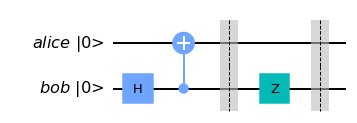

In [ ]:
#message to send
message = '10'

#conditions
if message[1] == '1':
  superdense_coding_circuit.x(0)

if message[0] == '1':
  superdense_coding_circuit.z(1)

superdense_coding_circuit.barrier()

superdense_coding_circuit.draw(initial_state=True, output='mpl')




#Bob decodes alice's message

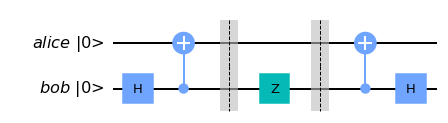

In [ ]:
#Bob applies cx gate
superdense_coding_circuit.cx(1,0)

#bob applies h gate
superdense_coding_circuit.h(1)

superdense_coding_circuit.draw(initial_state=True, output='mpl')

#Apply Measurement

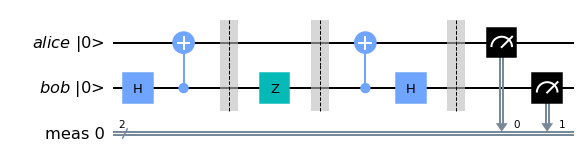

In [ ]:
#Measure alice and bob qubit
superdense_coding_circuit.measure_all()

superdense_coding_circuit.draw(initial_state=True, output='mpl')

#Creating another superdense coding circuit

In [ ]:
import copy

second_superdense_coding_circuit = copy.deepcopy(superdense_coding_circuit)

#Run on Simulator

In [ ]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
superdense_coding_circuit.save_statevector()

#assemble
qobj = assemble(superdense_coding_circuit)

#run
job = simulator.run(superdense_coding_circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Count visualization

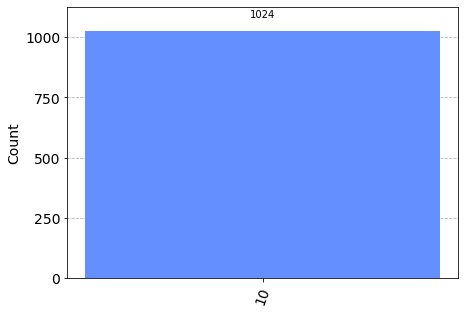

In [ ]:
plot_histogram(result.get_counts())

Everytime we get 10, so the message is successfully decoded.

#Run on real device

In [ ]:
#get the least busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.save_account('2fb508208e14db369716764df552364ae1a91a6483ea34f6405b74d7805dc0732bdf899e3568959d8ef139e3af389bb82ed59d08caeeabb1e60dcab8e1a3d328')
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_quito')

backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits>= 3 and not b.configuration().simulator and b.status().operational==True))

print(backend)
t_qc = transpile(second_superdense_coding_circuit,backend,optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)

configrc.store_credentials:WARNING:2022-11-06 16:36:39,724: Credentials already present. Set overwrite=True to overwrite.


ibmq_manila
Job Status: job has successfully run


#Result

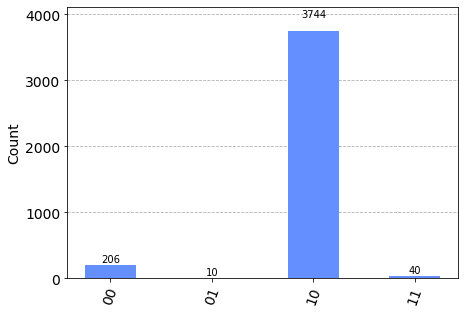

In [ ]:
result = job.result()
counts = result.get_counts(second_superdense_coding_circuit)
plot_histogram(counts)

# #Measure Accuracy

In [ ]:
print(counts)
y=0
for x in counts:
  y = y+counts[x]

print(y)

{'00': 206, '01': 10, '10': 3744, '11': 40}
4000


In [ ]:
correct_results = counts[message]
print(correct_results)
accuracy = (correct_results/y)*100
print('Accuracy:', accuracy)

3744
Accuracy: 93.60000000000001
